<center>Name:Quratulain<br>
Email:QuratulainkhanAIML1@hotmail.com<br>
Github:QuratulainkhanAIML1<br>
Title:Multi Linear regression on titanic dataset by q</center>

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib.pyplot
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score



In [3]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [5]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
(titanic.describe())

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
msa=titanic['age'].mean()
titanic['age'].fillna(msa,inplace=True)
titanic['age'].isnull().sum()

C:\Users\qurat\AppData\Local\Temp\ipykernel_7156\903099327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(msa,inplace=True)


np.int64(0)

In [8]:
FareMedian=titanic['fare'].median()
titanic['fare'].fillna(FareMedian, inplace=True)
titanic['fare'].isnull().sum()

C:\Users\qurat\AppData\Local\Temp\ipykernel_7156\2111384199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['fare'].fillna(FareMedian, inplace=True)


np.int64(0)

In [9]:
titanic=titanic.dropna(subset=['deck','embarked','embark_town'])
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [10]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [11]:
titanic['age']=titanic['age'].apply(lambda x: x if x < 100 else msa)
titanic['age']=titanic['age'].apply(lambda x: x if x > 18 else msa)
titanic['age']

C:\Users\qurat\AppData\Local\Temp\ipykernel_7156\2847249190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['age']=titanic['age'].apply(lambda x: x if x < 100 else msa)
C:\Users\qurat\AppData\Local\Temp\ipykernel_7156\2847249190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['age']=titanic['age'].apply(lambda x: x if x > 18 else msa)


1      38.000000
3      35.000000
6      54.000000
10     29.699118
11     58.000000
         ...    
871    47.000000
872    33.000000
879    56.000000
887    19.000000
889    26.000000
Name: age, Length: 201, dtype: float64

In [12]:
titanic['fare']=titanic['fare'].apply(lambda x: x if x < 20 else msa)
titanic['fare']=titanic['fare'].apply(lambda x: x if x  >40 else msa)
titanic['fare']

C:\Users\qurat\AppData\Local\Temp\ipykernel_7156\2520436427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['fare']=titanic['fare'].apply(lambda x: x if x < 20 else msa)
C:\Users\qurat\AppData\Local\Temp\ipykernel_7156\2520436427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['fare']=titanic['fare'].apply(lambda x: x if x  >40 else msa)


1      29.699118
3      29.699118
6      29.699118
10     29.699118
11     29.699118
         ...    
871    29.699118
872    29.699118
879    29.699118
887    29.699118
889    29.699118
Name: fare, Length: 201, dtype: float64

In [13]:
grp=titanic.groupby('age')['fare'].mean()
print(grp)

age
19.000000    29.699118
21.000000    29.699118
22.000000    29.699118
23.000000    29.699118
24.000000    29.699118
25.000000    29.699118
26.000000    29.699118
27.000000    29.699118
28.000000    29.699118
29.000000    29.699118
29.699118    29.699118
30.000000    29.699118
31.000000    29.699118
32.000000    29.699118
32.500000    29.699118
33.000000    29.699118
34.000000    29.699118
35.000000    29.699118
36.000000    29.699118
36.500000    29.699118
37.000000    29.699118
38.000000    29.699118
39.000000    29.699118
40.000000    29.699118
41.000000    29.699118
42.000000    29.699118
43.000000    29.699118
44.000000    29.699118
45.000000    29.699118
45.500000    29.699118
46.000000    29.699118
47.000000    29.699118
48.000000    29.699118
49.000000    29.699118
50.000000    29.699118
51.000000    29.699118
52.000000    29.699118
53.000000    29.699118
54.000000    29.699118
55.000000    29.699118
56.000000    29.699118
57.000000    29.699118
58.000000    29.699118
60.0000

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     201 non-null    int64   
 1   pclass       201 non-null    int64   
 2   sex          201 non-null    object  
 3   age          201 non-null    float64 
 4   sibsp        201 non-null    int64   
 5   parch        201 non-null    int64   
 6   fare         201 non-null    float64 
 7   embarked     201 non-null    object  
 8   class        201 non-null    category
 9   who          201 non-null    object  
 10  adult_male   201 non-null    bool    
 11  deck         201 non-null    category
 12  embark_town  201 non-null    object  
 13  alive        201 non-null    object  
 14  alone        201 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 20.1+ KB


In [15]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,201.000000,201.000000,201.000000,201.000000,201.000000,2.010000e+02
mean,0.666667,1.199005,37.267975,0.447761,0.442786,2.969912e+01
std,0.472582,0.529338,12.188117,0.631274,0.733458,3.561584e-15
min,0.000000,1.000000,19.000000,0.000000,0.000000,2.969912e+01
25%,0.000000,1.000000,29.699118,0.000000,0.000000,2.969912e+01
50%,1.000000,1.000000,33.000000,0.000000,0.000000,2.969912e+01
75%,1.000000,1.000000,47.000000,1.000000,1.000000,2.969912e+01
max,1.000000,3.000000,80.000000,3.000000,4.000000,2.969912e+01


In [16]:
X = titanic[['age','pclass']]
Y = titanic['fare']


In [17]:
from sklearn.model_selection import train_test_split                   #step1    Import train_test_split 
Xtrain,Xtest,Ytrain,Ytest= train_test_split(X,Y,test_size=0.2,random_state=42)             #step2 slpit for train and test
print("Xtrain:",Xtrain)                                #step3 Printing
print("Xtest:",Xtest)
print("Ytrain:",Ytrain)
print("Ytest:",Ytest)

Xtrain:            age  pclass
879  56.000000       1
195  58.000000       1
128  29.699118       3
544  50.000000       1
871  47.000000       1
..         ...     ...
486  35.000000       1
75   25.000000       3
434  50.000000       1
781  29.699118       1
462  47.000000       1

[160 rows x 2 columns]
Xtest:            age  pclass
445  29.699118       1
88   23.000000       1
166  29.699118       1
710  24.000000       1
577  39.000000       1
516  34.000000       2
319  40.000000       1
748  19.000000       1
765  51.000000       1
245  44.000000       1
310  24.000000       1
802  29.699118       1
730  29.000000       1
341  24.000000       1
820  52.000000       1
779  43.000000       1
284  29.699118       1
690  31.000000       1
366  60.000000       1
318  31.000000       1
556  48.000000       1
92   46.000000       1
671  31.000000       1
435  29.699118       1
309  30.000000       1
298  29.699118       1
370  25.000000       1
311  29.699118       1
558  39.000000    

In [18]:
from sklearn.linear_model import LinearRegression       #step1     Model Selection
model=LinearRegression()                                #step2     Store model in a variable
model.fit(Xtrain,Ytrain)                                #step3     Fit model in training data
Y_predict=model.predict(Xtest)                         #step4     Add test data from x to predict 
Y_predict

array([29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
       29.69911765])

In [19]:
from sklearn.metrics import mean_absolute_error  #step1    Import metrices
MAE = mean_absolute_error(Ytest,Y_predict)                                                        #step2    apply metrices
print(MAE)  

0.0


In [20]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(Ytest,Y_predict)
print(MSE)

0.0


In [21]:
from sklearn.metrics import root_mean_squared_error
RMSE=root_mean_squared_error(Ytest,Y_predict)
print(RMSE)

0.0


In [22]:
from sklearn.metrics import r2_score
r2=r2_score(Ytest,Y_predict)
print(r2)

1.0


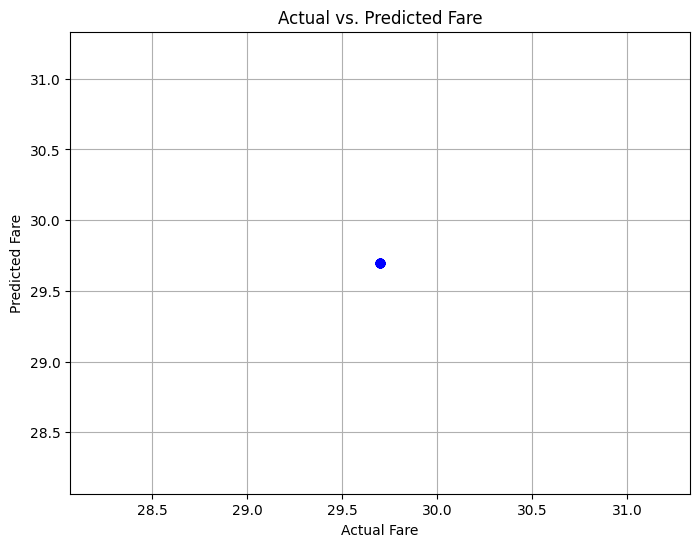

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(Ytest, Y_predict, color='blue', alpha=0.6)
plt.plot([Ytest.min(), Ytest.max()], [Ytest.min(), Ytest.max()], color='red', linestyle='--')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs. Predicted Fare')
plt.grid(True)
plt.show()

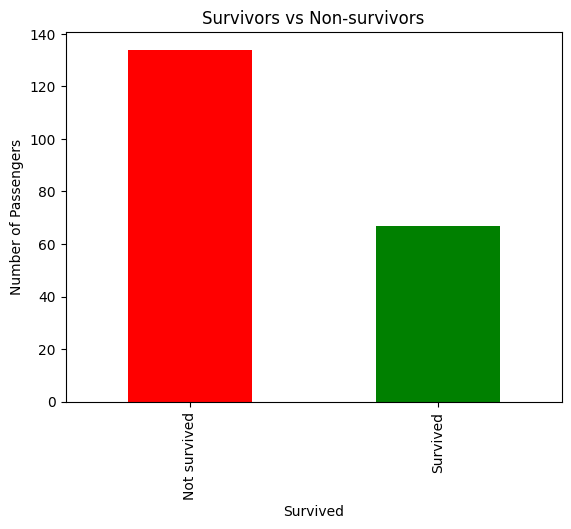

In [24]:
survival_counts=titanic['survived'].value_counts()
survival_counts.plot(kind='bar',color=['red','green'])
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.title('Survivors vs Non-survivors')
#Adjust xtickets to show labels
plt.xticks(ticks=[0,1],labels=['Not survived','Survived'])
plt.show()